In [3]:
# EXPLORACION DE DATOS POR PRECIO CARO O BARATO


In [4]:
# SETEAR NOTEBOOK
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file = 'data_apartment_5_final.csv'
data = pd.read_csv(file)

In [6]:
# HACER PRIMER TEST

In [7]:
data= data.set_index(list(data.columns)[0], drop=True)
data.index.name= ''
data

,property_type,place_name,state_name,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,place_name_2,floor,rooms,expenses,above_mean,above_median
,,,,,,,,,,,,,,
2,apartment,Mataderos,Capital Federal,72000.000000,USD,55.0,55.0,1309.090909,Mataderos,NaN,NaN,NaN,0.0,1.0
5189,apartment,Mataderos,Capital Federal,67000.000000,USD,40.0,28.0,1675.000000,Mataderos,NaN,NaN,NaN,0.0,0.0
6450,apartment,Mataderos,Capital Federal,90000.000000,USD,52.0,48.0,1730.769231,Mataderos,NaN,NaN,200.0,0.0,1.0
7725,apartment,Mataderos,Capital Federal,88000.000000,USD,50.0,38.0,1760.000000,Mataderos,NaN,2.0,500.0,0.0,0.0
8339,apartment,Mataderos,Capital Federal,93600.000000,USD,51.0,46.0,1835.294118,Mataderos,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68622,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,63759.245132,USD,36.0,33.0,1752.614722,otros,NaN,NaN,NaN,0.0,1.0
68637,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,63759.245132,USD,36.0,33.0,1752.614722,otros,NaN,NaN,NaN,0.0,1.0
68651,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,52140.893797,USD,30.0,28.0,1719.899333,otros,NaN,NaN,NaN,0.0,0.0


In [8]:
# CONSEGUIR SET DE DATOS

In [9]:
lista_correlacion = ['Wilde', 'Villa Luzuriaga', 'Villa Bosch', 'Santos Lugares', 'San Miguel', 'Once', 'La Plata', 'Floresta', 'Centro', 'Caseros', 'Balvanera']
data = data[data.place_name.isin(lista_correlacion)]

data = data[data['surface_total_in_m2'].notna()]

data = data.sort_values(by='surface_total_in_m2', ascending=True)

data['surface_pct_change'] = data.surface_total_in_m2.pct_change() *100
data['price_pct_change'] = data.price.pct_change() *100

data['price_pct_change_positive'] = data.eval('price_pct_change > 0')
data['changing_surface'] = data.eval('surface_pct_change > 0.2 and surface_pct_change < 4')

data.reset_index(inplace=True)

data

,,property_type,place_name,state_name,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,place_name_2,floor,rooms,expenses,above_mean,above_median,surface_pct_change,price_pct_change,price_pct_change_positive,changing_surface
0,62964,apartment,Balvanera,Capital Federal,54000.0,USD,22.0,22.0,2454.545455,Balvanera,NaN,1.0,750.0,0.0,0.0,NaN,NaN,False,False
1,60778,apartment,Floresta,Capital Federal,53000.0,USD,22.0,19.0,2409.090909,Floresta,NaN,1.0,NaN,0.0,0.0,0.000000,-1.851852,False,False
2,42178,apartment,Balvanera,Capital Federal,55000.0,USD,22.0,22.0,2500.000000,Balvanera,NaN,1.0,NaN,0.0,0.0,0.000000,3.773585,True,False
3,50405,apartment,San Miguel,Bs.As. G.B.A. Zona Norte,47000.0,USD,22.0,22.0,2136.363636,San Miguel,NaN,NaN,900.0,0.0,0.0,0.000000,-14.545455,False,False
4,26889,apartment,Once,Capital Federal,55000.0,USD,23.0,NaN,2391.304348,Once,NaN,1.0,NaN,0.0,0.0,4.545455,17.021277,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,59255,apartment,Once,Capital Federal,248000.0,USD,174.0,174.0,1425.287356,Once,NaN,6.0,NaN,1.0,1.0,1.162791,-31.110920,False,True
1787,61792,apartment,Floresta,Capital Federal,295000.0,USD,175.0,NaN,1685.714286,Floresta,NaN,5.0,NaN,1.0,1.0,0.574713,18.951613,True,True
1788,92699,apartment,Once,Capital Federal,260000.0,USD,184.0,162.0,1413.043478,Once,NaN,NaN,6000.0,1.0,1.0,5.142857,-11.864407,False,False
1789,18123,apartment,Floresta,Capital Federal,305000.0,USD,185.0,145.0,1648.648649,Floresta,NaN,6.0,3000.0,1.0,1.0,0.543478,17.307692,True,True


In [10]:
# CREAR CATEGORIA Y VISUALIZAR

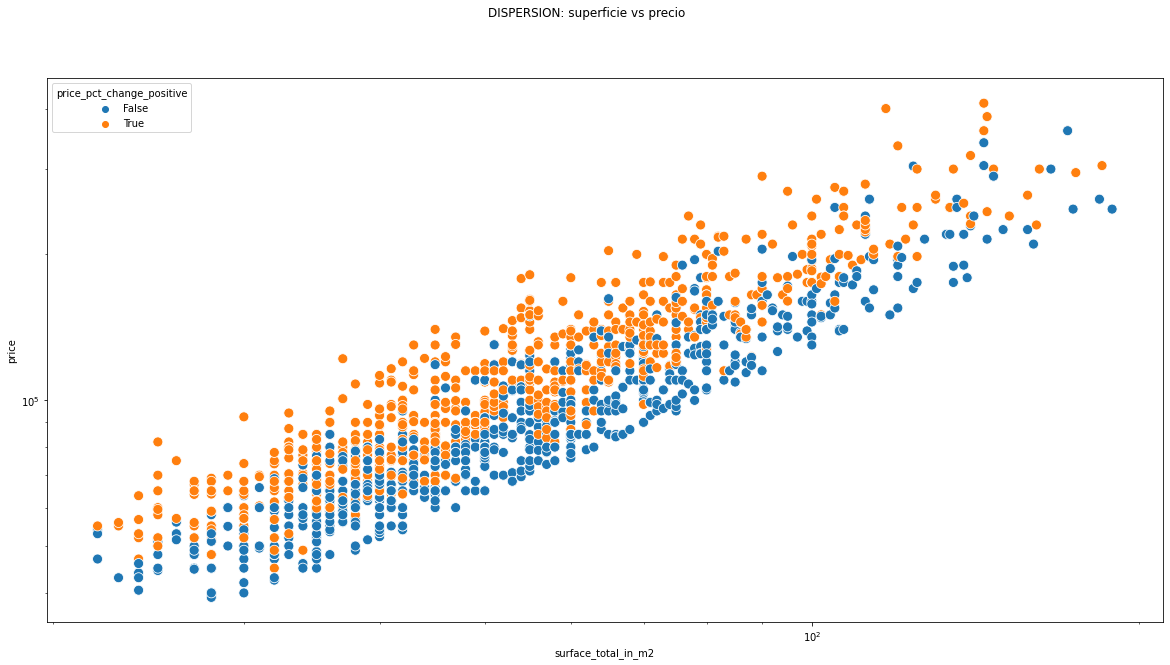

In [14]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('DISPERSION: superficie vs precio')
ax = plt.axes()

ax.set(xscale='log', yscale='log')
g = sns.scatterplot(x='surface_total_in_m2', y='price', data=data, hue='price_pct_change_positive', s=100)

-------------------

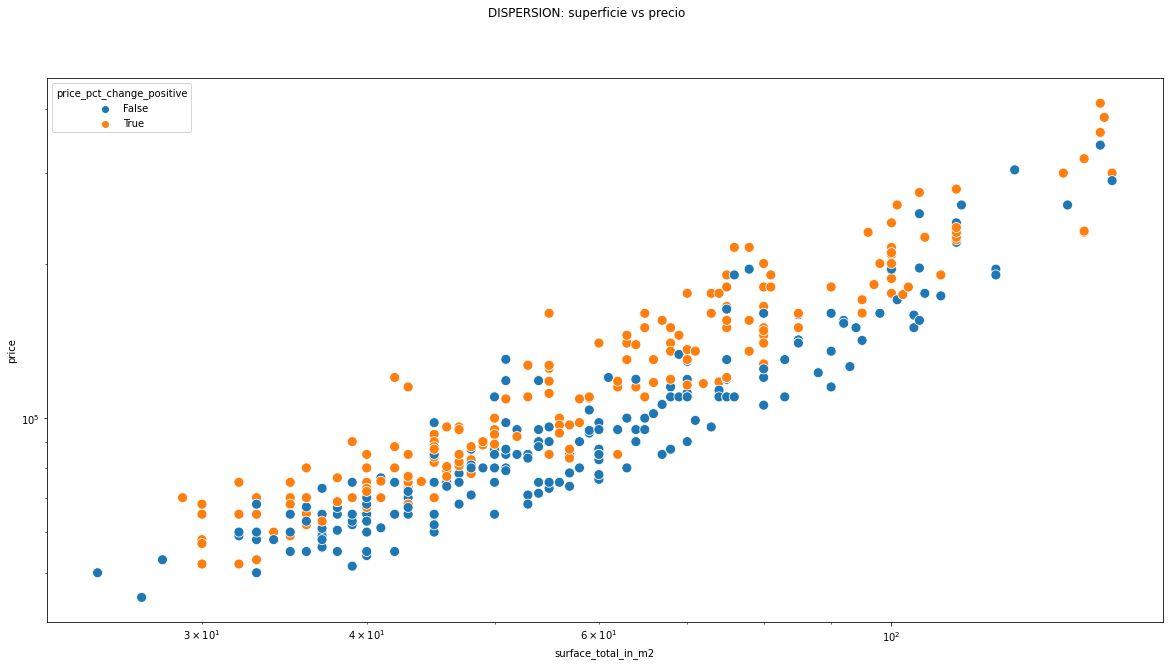

In [25]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('DISPERSION: superficie vs precio')
ax = plt.axes()

ax.set(xscale='log', yscale='log')
g = sns.scatterplot(x='surface_total_in_m2', y='price', data=data[data.place_name=='La Plata'], hue='price_pct_change_positive', s=100)

In [26]:
data_check = data[data.place_name=='La Plata']

data_check.loc[:,'price2_pct_change'] = data_check.price.pct_change() *100

data_check.loc[:,'price2_pct_change_positive'] = data_check.eval('price_pct_change > 0')
data_check;

C:\Users\Agustin\anaconda3.2\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Agustin\anaconda3.2\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\Agustin\anaconda3.2\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

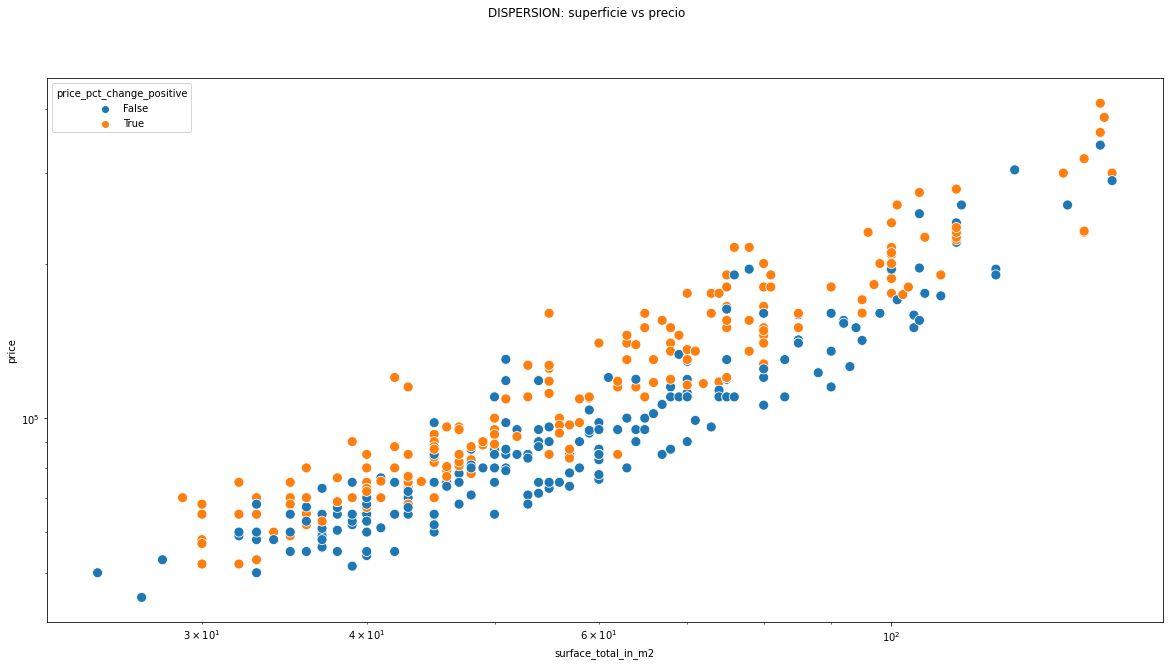

In [27]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('DISPERSION: superficie vs precio')
ax = plt.axes()

ax.set(xscale='log', yscale='log')
g = sns.scatterplot(x='surface_total_in_m2', y='price', data=data_check, hue='price_pct_change_positive', s=100)

In [ ]:
# A SIMPLE VISTA NO PARECE HABER DIFERENCIA EN ESTA MUESTRA ENTRE CATEGORIZAR AL CONJUNTO O POR SUBCONJUNTO DE PLACE_NAME
# PASAMOS A LA PARTE DE ENTRENAMIENTO